In [7]:
import os
import sys
import numpy as np
from util import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

num_models = 9
models = [str(num) for num in range(1, num_models)]
# if len(sys.argv) > 1:
#     models = [sys.argv[1]]

# Get test imgs
img_arr, img_labels = read_in_images()
train_imgs, test_imgs, train_labels, test_labels = train_test_split(img_arr, img_labels, test_size = .2, random_state = 42)

# Binarize labels
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer().fit(train_labels)
y_test = label_bin.transform(test_labels)

correct_info = []

# Run predictions
# os.system('cls')
for model_num in models:
    print(model_num)
    print('model' + str(model_num) + '/model' + str(model_num))
    model = tf.keras.models.load_model('model' + str(model_num) + '/model' + str(model_num))

    pred = np.argmax(model.predict(np.array(test_imgs)), axis=-1)

    print(5*"=", model_num, 5*"=")
    result = model.evaluate(x=np.array(test_imgs), y=y_test)
    pred_labels = [label_bin.classes_[i] for i in pred]
    correct_info.append(plot_example_errors(pred_labels, test_labels, test_imgs))
    print(13*"=")

-----------------
Reading in images
-----------------
0
model0/model0
===== 0 =====
57/57 [==============================] - 6s 102ms/step - loss: 1.0592 - accuracy: 0.6333
1140 Correct
660 Incorrect
1
model1/model1
===== 1 =====
57/57 [==============================] - 6s 101ms/step - loss: 0.1502 - accuracy: 0.9522
1714 Correct
86 Incorrect
2
model2/model2
===== 2 =====
57/57 [==============================] - 6s 106ms/step - loss: 1.7690 - accuracy: 0.6656
1198 Correct
602 Incorrect
3
model3/model3
===== 3 =====
57/57 [==============================] - 2s 32ms/step - loss: 0.3369 - accuracy: 0.8850
1593 Correct
207 Incorrect
4
model4/model4
===== 4 =====
57/57 [==============================] - 1s 13ms/step - loss: 0.2032 - accuracy: 0.9344
1682 Correct
118 Incorrect
5
model5/model5
===== 5 =====
57/57 [==============================] - 7s 124ms/step - loss: 0.2891 - accuracy: 0.9239
1663 Correct
137 Incorrect
6
model6/model6
===== 6 =====
57/57 [==============================] - 9s

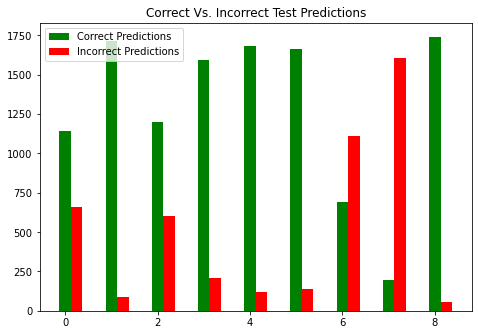

In [11]:
# Get plot
X = np.arange(len(correct_info))
correct_info = np.array(correct_info)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, correct_info[:,0], color='g', width=.25)
ax.bar(X + 0.25, correct_info[:,1], color='r', width=.25)
plt.title("Correct Vs. Incorrect Test Predictions")
plt.legend(['Correct Predictions', "Incorrect Predictions"])
plt.show()